## AUTOMATIC TEXT SUMMARIZATION

is the task of producing a concise and fluent summary while preserving key information content and overall meaning.

Usecases:
 - Media monitoring
 - Document analysis
 - Social media marketing

## Extraction based Text Summarization using NLTK

Source: Stackabuse.com (Usman Malik)

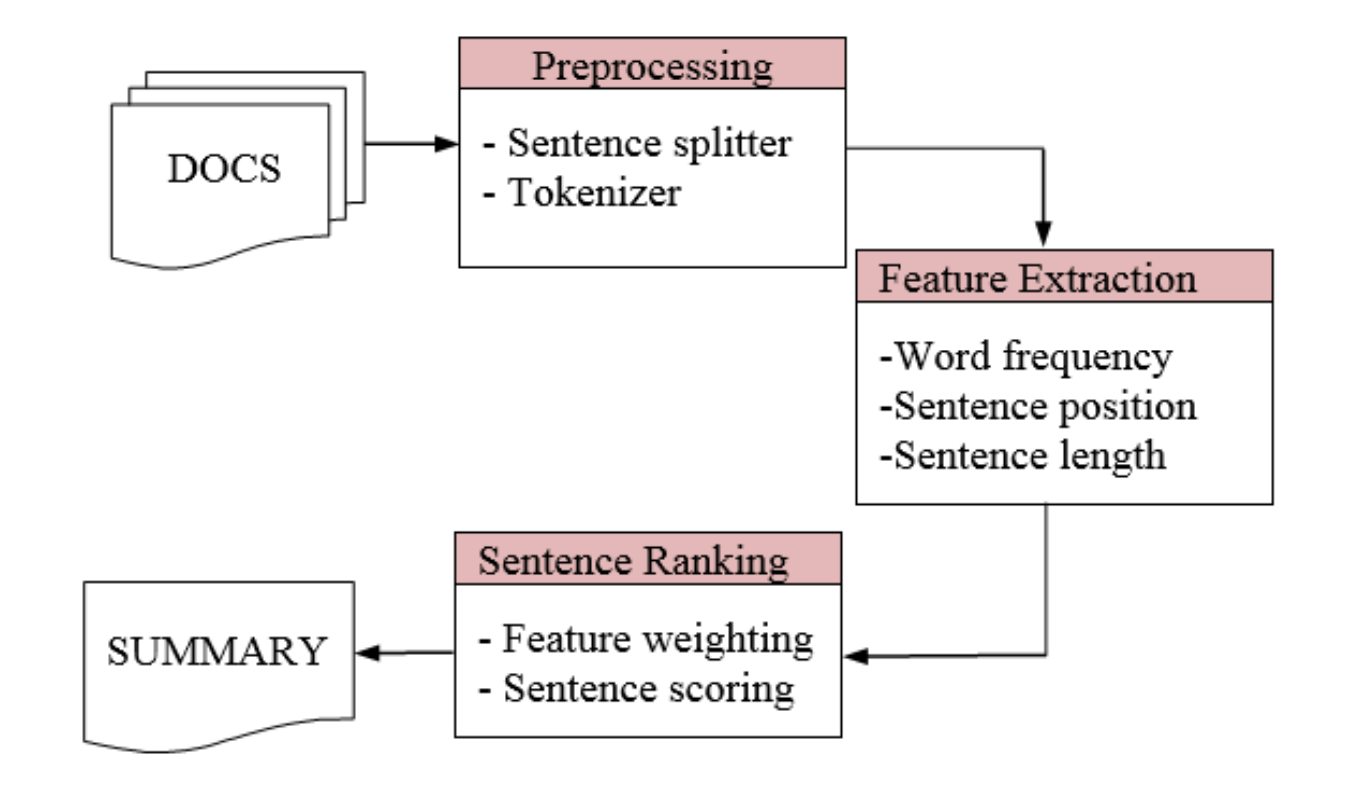

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

#### Read web url 

In [ ]:
import bs4 as bs
import urllib.request
import re
import lxml

scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scraped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [ ]:
print (article_text)

#### Read square brackets with numbers and extra spaces

In [ ]:
# Removing Square Brackets and Extra Spaces
article_text = re.sub(r'\[[0-9]+\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

In [ ]:
article_text

#### Remove special characters

In [ ]:
# Removing special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

### **Exercise**: Change the above code to not to remove digits, ".", and ","

In [ ]:
formatted_article_text

In [ ]:
sentence_list = nltk.sent_tokenize(formatted_article_text)

In [ ]:
sentence_list

In [ ]:
print (f"Number of sentences: {len(sentence_list)}")

 **Note: If the number of sentences is 1, then the sentence delimiters ('.') must have got removed by mistake.  Go back and fix the re.sub statement.**

#### Calculate weighted frequency of words

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [ ]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

#### Score each sentence by adding weighted frequencies of words in the sentence

In [ ]:
sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [ ]:
len(sentence_list)

#### Pick the sentences with most score

In [ ]:
import heapq
summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)

summary_sentences

In [ ]:
summary = ' '.join(summary_sentences)
summary

## Text Summarization using Gensim

https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf

In [ ]:
!pip install beautifulsoup4


In [ ]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import urllib, bs4

In [ ]:
scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scraped_data.read()

parsed_article = bs4.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [ ]:
summarize(article_text, word_count=100)

In [ ]:
keywords(article_text, ratio=.01, lemmatize=True, scores=True)

### Exercise
#### Try using the above methods for few articles

## Text summarization using transformers

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
summarizer = pipeline("summarization")

In [ ]:
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [ ]:
output = summarizer(ARTICLE)

output[0]['summary_text']